In [295]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold
import tensorflow as tf

In [296]:
from collections import Counter
# Custom TF-IDF Vectorizer
class CustomTFIDFVectorizer:
    def __init__(self):
        self.word_counts = Counter()
        self.doc_counts = Counter()
        self.total_docs = 0
        self.feature_names = []

    def fit(self, documents):
        for document in documents:
            unique_words = set(document.split())
            self.word_counts.update(unique_words)
            self.doc_counts.update(unique_words)
            self.total_docs += 1

        self.feature_names = list(self.word_counts.keys())


    def transform(self, documents):
        tfidf_matrix = np.zeros((len(documents), len(self.word_counts)))

        for i, document in enumerate(documents):
            words = document.split()
            word_counts = Counter(words)

            for j, word in enumerate(self.word_counts):
                tf = word_counts[word] / len(words)
                idf = np.log((self.total_docs + 1) / (self.doc_counts[word] + 1)) + 1  # Add 1 to avoid division by zero
                #tfidf_matrix[i, j] = tf * idf
                tfidf_matrix[i, j] = round(tf * idf, 4)

        return tfidf_matrix,self.feature_names

In [297]:
words = pd.read_csv('Sara/Sara-Full.csv')

In [298]:
words

Sentences   Emotion
0    শ্ৰীকান্ত কমললতা কিন্তু কেঁদে কেঁদে সারা হয়ে ...  Negative
1    চলে গেলে ও যেন শোকে সারা হয়ে যায় কথাটা আরও খ...  Negative
2    দাওয়া বন্ধ কেবল কেঁদে কেঁদে সারা হন নিজের মনক...  Negative
3    পাকের কিনারে...আমি কেঁদে কেঁদে হইগো সারা ধন্য ...  Negative
4    পাকের কিনারে...আমি কেঁদে কেঁদে হইগো সারা ধন্য ...  Negative
..                                                 ...       ...
106  যুদ্ধকালীন তৎপরতায় সারা হল দুর্গাপুরের ব্যারে...  Positive
107  এক নম্বর লকগেটের ক্ষতিগ্রস্ত অংশ সারা এর কাজ শ...  Positive
108        সব বের হয়ে যেত সেটা সারা হল যখন আমার সে কি  Positive
109  চিলতে উঠোনে মহোৎসাহে চিরর বাইক সারা দেখছে দিব্...  Positive
110  লোক জেগে থাকেনি কখনো অবশেষে সারা শেষ হল আমরা খ...  Positive

[111 rows x 2 columns]

In [299]:
sentences = words['Sentences']
emotion = words['Emotion']
tfidf_vectorizer = CustomTFIDFVectorizer()
tfidf_vectorizer.fit(words['Sentences'])
sentences1,feature_names = tfidf_vectorizer.transform(words['Sentences'])
dataset = pd.DataFrame(sentences1,columns=feature_names)

In [300]:
dataset

কিন্তু  শ্ৰীকান্ত  যাবে   কেঁদে  কথাটা  কমললতা    হয়ে  আমাদের    ইহার  \
0    0.3938     0.4569  0.42  0.7140   0.42  0.4569  0.3019    0.42  0.4569   
1    0.0000     0.0000  0.00  0.0000   0.42  0.0000  0.3019    0.00  0.0000   
2    0.0000     0.0000  0.00  0.7140   0.00  0.0000  0.0000    0.00  0.0000   
3    0.0000     0.0000  0.00  0.7140   0.00  0.0000  0.0000    0.00  0.0000   
4    0.0000     0.0000  0.00  0.8726   0.00  0.0000  0.0000    0.00  0.0000   
..      ...        ...   ...     ...    ...     ...     ...     ...     ...   
106  0.0000     0.0000  0.00  0.0000   0.00  0.0000  0.0000    0.00  0.0000   
107  0.0000     0.0000  0.00  0.0000   0.00  0.0000  0.0000    0.00  0.0000   
108  0.0000     0.0000  0.00  0.0000   0.00  0.0000  0.3019    0.00  0.0000   
109  0.0000     0.0000  0.00  0.0000   0.00  0.0000  0.0000    0.00  0.0000   
110  0.0000     0.0000  0.00  0.0000   0.00  0.0000  0.0000    0.00  0.0000   

       সারা  ...   উঠোনে  মহোৎসাহে   চিলতে   দেখছে    শুতে    জেগে  থাকেনি  \
0    0.0909  ...  0.0000    0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
1    0.0909  ...  0.0000    0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
2    0.0909  ...  0.0000    0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
3    0.0909  ...  0.0000    0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
4    0.1111  ...  0.0000    0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
..      ...  ...     ...       ...     ...     ...     ...     ...     ...   
106  0.1250  ...  0.0000    0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
107  0.0909  ...  0.0000    0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
108  0.0909  ...  0.0000    0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
109  0.0909  ...  0.4569    0.4569  0.4569  0.4569  0.0000  0.0000  0.0000   
110  0.0909  ...  0.0000    0.0000  0.0000  0.0000  0.4569  0.4569  0.4569   

        লোক  খেয়েদেয়ে    কখনো  
0    0.0000      0.0000  0.0000  
1    0.0000      0.0000  0.0000  
2    0.0000      0.0000  0.0000  
3    0.0000      0.0000  0.0000  
4    0.0000      0.0000  0.0000  
..      ...         ...     ...  
106  0.0000      0.0000  0.0000  
107  0.0000      0.0000  0.0000  
108  0.0000      0.0000  0.0000  
109  0.0000      0.0000  0.0000  
110  0.4569      0.4569  0.4569  

[111 rows x 684 columns]

In [301]:
labelencode = LabelEncoder()
emotion1 = labelencode.fit_transform(emotion)
emotion1 = tf.keras.utils.to_categorical(emotion1,3)

In [302]:
NB_CLASSES=3
BATCH_SIZE=32
EPOCHS=50
alpha = 0.01

In [303]:
k_folds = 10
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
accuracies = []
all_predictions = []
all_true_values = []
models = []

In [304]:
for train_index, val_index in kf.split(sentences1):
    X_train_fold, X_val_fold = sentences1[train_index], sentences1[val_index]
    Y_train_fold, Y_val_fold = emotion1[train_index], emotion1[val_index]
    N_HIDDEN = int((X_train_fold.shape[1] * NB_CLASSES)**0.5)
    # Create a new model for each fold
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(N_HIDDEN, input_shape=(X_train_fold.shape[1],), name='Hidden-Layer-1', activation=tf.keras.layers.LeakyReLU(alpha)))
    model.add(tf.keras.layers.Dense(N_HIDDEN, name='Hidden-Layer-2', activation=tf.keras.layers.LeakyReLU(alpha)))
    model.add(tf.keras.layers.Dense(NB_CLASSES, name='Output-Layer', activation='softmax'))

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

    # Train the model on the current fold
    history = model.fit(X_train_fold, Y_train_fold, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_val_fold, Y_val_fold),verbose=0)

    # Evaluate the model on the validation set for this fold
    loss, accuracy = model.evaluate(X_val_fold, Y_val_fold)
    accuracies.append(accuracy)
    # Generate predictions on the validation set
    Y_pred = model.predict(X_val_fold)
    # Convert predictions to class labels
    y_pred_labels = np.argmax(Y_pred, axis=1)
    y_true_labels = np.argmax(Y_val_fold, axis=1)
    all_predictions.extend(y_pred_labels)
    all_true_values.extend(y_true_labels)

C:\Users\shata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6667 - loss: 1.0138
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5455 - loss: 0.9713
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4545 - loss: 1.4537
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6364 - loss: 0.9079
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8182 - loss: 0.6390
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4545 - loss: 0.9380
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6364 - loss: 0.9244
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6364 - loss: 0.7899
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7273 - loss: 0.6482
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━

In [305]:
average_accuracy = sum(accuracies) / len(accuracies)
print(f"\nAverage Accuracy: {average_accuracy*100}")


Average Accuracy: 63.93939435482026


In [306]:
#!pip install seaborn

In [307]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(all_true_values, all_predictions)

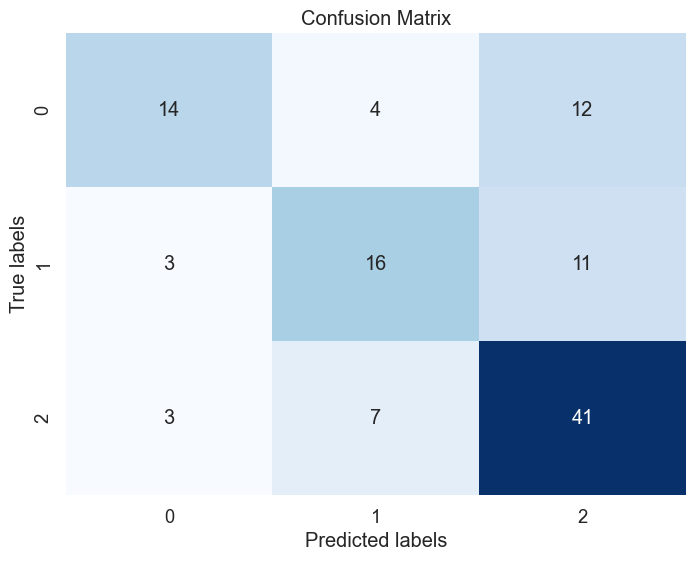

In [308]:
# Assuming you have the number of classes stored in NB_CLASSES variable
classes = np.arange(NB_CLASSES)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(all_true_values, all_predictions)

# Plotting the confusion matrix with seaborn heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()